In [290]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os
import warnings
import itertools
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

%matplotlib inline
from matplotlib.pylab import rcParams

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

os.chdir('/Users/Waseem/Desktop/Test/GSN.Data')




In [291]:
file = open('stations.txt', 'r').readlines()

In [292]:
file[:10]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

In [293]:
stations = {}

for line in file:
    if 'GSN' in line:
        feilds = line.split()
        
        stations[feilds[0]] = ' '.join(feilds[4:])

In [294]:
len(stations)

994

In [295]:
stations

{'AE000041196': 'SHARJAH INTER. AIRP GSN 41196',
 'AF000040930': 'NORTH-SALANG GSN 40930',
 'AG000060390': 'ALGER-DAR EL BEIDA GSN 60390',
 'AG000060590': 'EL-GOLEA GSN 60590',
 'AG000060611': 'IN-AMENAS GSN 60611',
 'AG000060680': 'TAMANRASSET GSN 60680',
 'AJ000037989': 'ASTARA GSN 37989',
 'ALM00013615': 'TIRANA RINAS GSN 13615',
 'AM000037781': 'ARAGAC VISOKOGORNAYA GSN 37781',
 'AO000066160': 'LUANDA GSN 66160',
 'AO000066270': 'WAKU KUNGU (CELA) GSN 66270',
 'AO000066390': 'LUBANGO (SA DA BAND GSN 66390',
 'AO000066410': 'MENONGUE (SERPA PIN GSN 66410',
 'AO000066422': 'MOCAMEDES GSN 66422',
 'AO000066447': 'MAVINGA GSN 66447',
 'AQW00061705': 'AS PAGO PAGO WSO AP GSN 91765',
 'AR000087007': 'LA QUIACA OBSERVATO GSN 87007',
 'AR000087065': 'RIVADAVIA GSN 87065',
 'AR000087078': 'LAS LOMITAS GSN 87078',
 'AR000087155': 'RESISTENCIA AERO GSN 87155',
 'AR000087217': 'LA RIOJA AERO. GSN 87217',
 'AR000087257': 'CERES AERO GSN 87257',
 'AR000087270': 'RECONQUISTA AERO GSN 87270',
 'AR

In [296]:
def findstations(s):
    found = {code: name for code, name in stations.items() if s in name}
    print(found)

In [297]:
findstations('CHURCHILL')

{'CA005060608': 'MB CHURCHILL CLIMATE GSN 71696'}


In [298]:
findstations('IRKUTSK')

{'RSM00030710': 'IRKUTSK GSN 30710'}


In [299]:
os.chdir('/Users/Waseem/Desktop/Test/GSN.Data')
open('CA006016295.dly','r').readlines()[:10]

['CA006016295198110TAVG-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999      45H S   80H S   78H S   88H S-9999   -9999      47H S   10H S  -20H S-9999   -9999   -9999   -9999   -9999   -9999   -9999     -55H S-9999   -9999   -9999      57H S\n',
 'CA006016295198111TMIN-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999    -110  S  -60  S  -50  S  -50  S  -50  S  -80  S  -50  S-9999   \n',
 'CA006016295198111PRCP-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999       0D S-9999   \n',
 'CA006016295198111TAVG-9999   -9999   -9999   -9999      -5H S-9999     -22H S  -17H S-9999   -9999   -9999     -85H S-9999   -9999       0H S-9999   -9999   -9999   -9999

In [300]:
open('readme.txt','r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

In [301]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [302]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [303]:
import os
os.chdir('/Users/Waseem/Desktop/Test/GSN.Data')
lihue = parsefile('USW00022536.dly')

In [304]:
lihue

array([(1950, 2, 'TMAX',   256,   256,   256,   267,   217,   228,   256,   272,   256,   256,   256,   244,   256,   256,   244,   244,   250,   256,   239,   250,   256,   256,   267,   261,   267,   267,   261,   261, -9999, -9999, -9999),
       (1950, 2, 'TMIN',   178,   156,   161,   167,   167,   167,   189,   211,   206,   217,   217,   211,   200,   200,   206,   183,   206,   206,   206,   194,   206,   200,   206,   200,   211,   183,   172,   200, -9999, -9999, -9999),
       (1950, 2, 'PRCP',     0,     0,     0,     0,   737,   406,    36,    38,     0,     0,     0,     0,    18,     5,    10,    18,    15,     5,     0,     0,    23,    10,     3,    48,     0,     0,     0,     5, -9999, -9999, -9999),
       ...,
       (2015, 9, 'WT03', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,     1, -9999,     1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2015, 9,

In [305]:
def unroll(record):
    
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'), np.timedelta64(1,'D'))
    
    rows = [(date, record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [306]:
unroll(lihue[0])

array([('1950-02-01', 25.6), ('1950-02-02', 25.6), ('1950-02-03', 25.6),
       ('1950-02-04', 26.7), ('1950-02-05', 21.7), ('1950-02-06', 22.8),
       ('1950-02-07', 25.6), ('1950-02-08', 27.2), ('1950-02-09', 25.6),
       ('1950-02-10', 25.6), ('1950-02-11', 25.6), ('1950-02-12', 24.4),
       ('1950-02-13', 25.6), ('1950-02-14', 25.6), ('1950-02-15', 24.4),
       ('1950-02-16', 24.4), ('1950-02-17', 25. ), ('1950-02-18', 25.6),
       ('1950-02-19', 23.9), ('1950-02-20', 25. ), ('1950-02-21', 25.6),
       ('1950-02-22', 25.6), ('1950-02-23', 26.7), ('1950-02-24', 26.1),
       ('1950-02-25', 26.7), ('1950-02-26', 26.7), ('1950-02-27', 26.1),
       ('1950-02-28', 26.1)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [307]:
def getobs(filename, obs):
    data =  np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    return data

In [308]:
lihue_tmax = getobs('AE000041196.dly', 'TMAX')
lihue_tmin = getobs('AE000041196.dly', 'TMIN')
lihue_tavg = getobs('AE000041196.dly', 'TAVG')
t1_tmax = getobs('USW00023188.dly', 'TMAX')
t1_tmin = getobs('USW00023188.dly', 'TMIN')

In [309]:
t1_tmax = getobs('USW00023188.dly', 'TMAX')
t1_tmin = getobs('USW00023188.dly', 'TMIN')


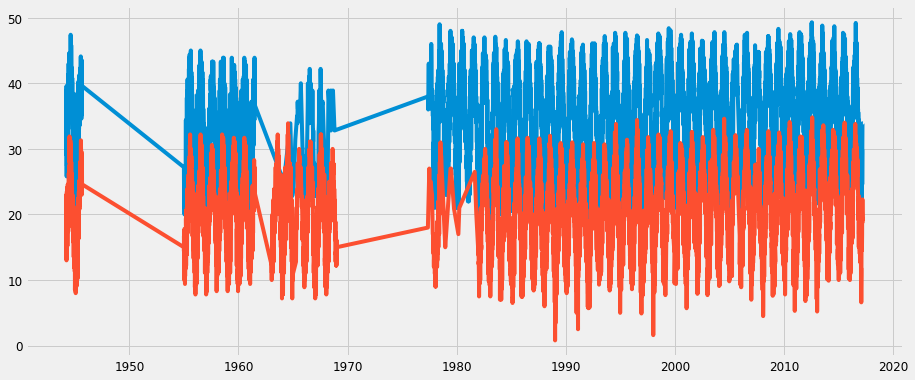

In [350]:
plt.figure(figsize = (14,6))
plt.plot(lihue_tmax['date'], lihue_tmax['value'])
plt.plot(lihue_tmin['date'], lihue_tmin['value'])


In [310]:
t1_tmax

array([('1939-07-01', 24.4), ('1939-07-02', 23.3), ('1939-07-03', 21.7),
       ..., ('2015-09-28',  nan), ('2015-09-29',  nan),
       ('2015-09-30',  nan)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [311]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(date at[nan],dates_float[~nan],data['value'][~nan])

In [352]:
fillnans(lihue_tmax)
fillnans(lihue_tmin)
fillnans(lihue_tavg)


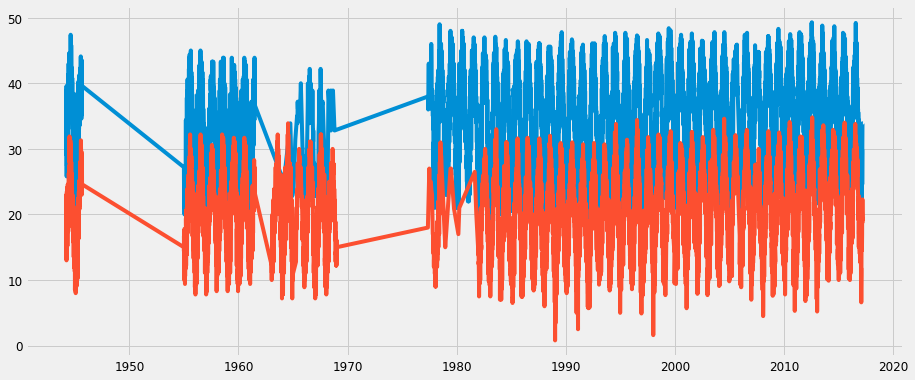

In [355]:
plt.figure(figsize=(14,6))
plt.plot(lihue_tmax['date'],lihue_tmax['value'])
plt.plot(lihue_tmin['date'],lihue_tmin['value'])


Runnnig MEAN - Defining the Smoothing funtion to change from mean 

In [313]:
def plot_smoothed(t,win=10):
    smoothed = np.correlate(t['value'],np.ones(win)/win,'same')
    
    plt.plot(t['date'],smoothed)

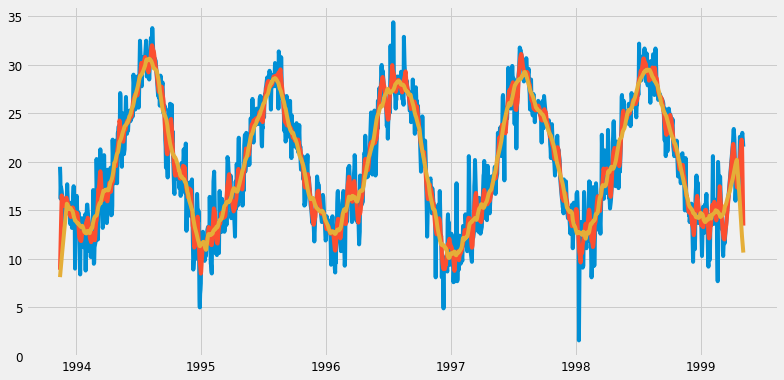

In [314]:
plt.figure(figsize = (12,6))

plt.plot(lihue_tmin[10000:12000]['date'],lihue_tmin[10000:12000]['value'])
plot_smoothed(lihue_tmin[10000:12000])
plot_smoothed(lihue_tmin[10000:12000],40)

In [315]:
t1_tmax

array([('1939-07-01', 24.4), ('1939-07-02', 23.3), ('1939-07-03', 21.7),
       ..., ('2015-09-28', 29.4), ('2015-09-29', 29.4),
       ('2015-09-30', 29.4)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

Selecting 6 Random Stations accross the world and Analysing the Minimum and Maximum temperatures.

In [360]:
import random
print(os.getcwd())

C:\Users\Waseem\Desktop\Test\GSN.Data


In [362]:
data_file = [stations]

In [364]:
data_test_6 = random.choices(data_file[1], k = 6)
data_test_6

IndexError: list index out of range

In [ ]:
data_test_1 = [os.path.splitext(x)[0] for x in data_test_10]
data_test_1

In [316]:
import pandas as pd

In [317]:
t_pd_1 = pd.DataFrame({'date':t1_tmax['date'],'Temperature':t1_tmax['value']})

In [318]:
data = t_pd_1.set_index('date')
data.index

DatetimeIndex(['1939-07-01', '1939-07-02', '1939-07-03', '1939-07-04',
               '1939-07-05', '1939-07-06', '1939-07-07', '1939-07-08',
               '1939-07-09', '1939-07-10',
               ...
               '2015-09-21', '2015-09-22', '2015-09-23', '2015-09-24',
               '2015-09-25', '2015-09-26', '2015-09-27', '2015-09-28',
               '2015-09-29', '2015-09-30'],
              dtype='datetime64[ns]', name='date', length=27851, freq=None)

In [2]:
data[-1]

NameError: name 'data' is not defined

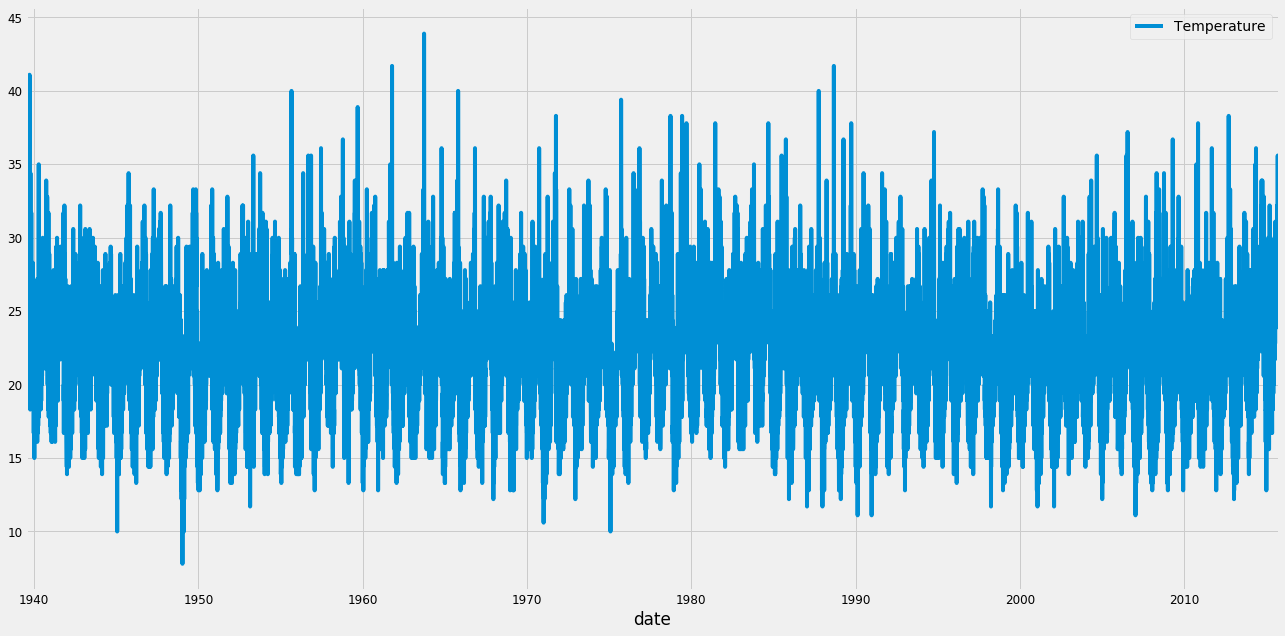

In [252]:
data.plot(figsize=(20,10))
plt.show()

In [253]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in
               list(itertools.product(p,d,q))]

print('Examples of parameter combinations for seasonal ARIMA...')
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for seasonal ARIMA...
SARIMAX: (0, 0, 1) X (0, 0, 1, 12)
SARIMAX: (0, 0, 1) X (0, 1, 0, 12)
SARIMAX: (0, 1, 0) X (0, 1, 1, 12)
SARIMAX: (0, 1, 0) X (1, 0, 0, 12)


In [254]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(data, order=param,
                                         seasonal_order=param_seasonal,
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
            
            result=mod.fit()
            
            print('ARIMA{}X{}12 - AIC:{}'.format(param,param_seasonal,
                                                result.aic))
        except:
            print('error')
            break

ARIMA(0, 0, 0)X(0, 0, 0, 12)12 - AIC:250632.14242057892
ARIMA(0, 0, 0)X(0, 0, 1, 12)12 - AIC:221018.17135010855
ARIMA(0, 0, 0)X(0, 1, 0, 12)12 - AIC:155696.62470504726
ARIMA(0, 0, 0)X(0, 1, 1, 12)12 - AIC:146370.74427494247
ARIMA(0, 0, 0)X(1, 0, 0, 12)12 - AIC:155475.02911095243
ARIMA(0, 0, 0)X(1, 0, 1, 12)12 - AIC:146405.21812176553
ARIMA(0, 0, 0)X(1, 1, 0, 12)12 - AIC:148859.6867170024
ARIMA(0, 0, 0)X(1, 1, 1, 12)12 - AIC:146327.18697696461
ARIMA(0, 0, 1)X(0, 0, 0, 12)12 - AIC:215765.7637882123
ARIMA(0, 0, 1)X(0, 0, 1, 12)12 - AIC:191006.52192339176
ARIMA(0, 0, 1)X(0, 1, 0, 12)12 - AIC:142511.0823691499
ARIMA(0, 0, 1)X(0, 1, 1, 12)12 - AIC:131472.97678039563
ARIMA(0, 0, 1)X(1, 0, 0, 12)12 - AIC:142158.37752226467
ARIMA(0, 0, 1)X(1, 0, 1, 12)12 - AIC:142688.1025597762
ARIMA(0, 0, 1)X(1, 1, 0, 12)12 - AIC:135245.15491873186
ARIMA(0, 0, 1)X(1, 1, 1, 12)12 - AIC:131466.34529974448
ARIMA(0, 1, 0)X(0, 0, 0, 12)12 - AIC:124535.42577260737
ARIMA(0, 1, 0)X(0, 0, 1, 12)12 - AIC:124491.18719793

The best Akaike fit using ARIMA is "ARIMA(1, 1, 1)X(0, 0, 1, 12)12 - AIC:120796.87722325724" 

After identifing the set of parameters that produces the best fitting model to our time series data.
plugging the optimal parameter values into a new SARIMAX model:

In [320]:
mod = sm.tsa.statespace.SARIMAX(data,
                               order=(1,1,1),
                               seasonal_order=(0,0,1,12),
                               enforce_stationarity=False,
                               enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6667      0.005    145.215      0.000       0.658       0.676
ma.L1         -0.9476      0.003   -374.781      0.000      -0.953      -0.943
ma.S.L12       0.0048      0.006      0.852      0.394      -0.006       0.016
sigma2         4.4878      0.024    185.500      0.000       4.440       4.535


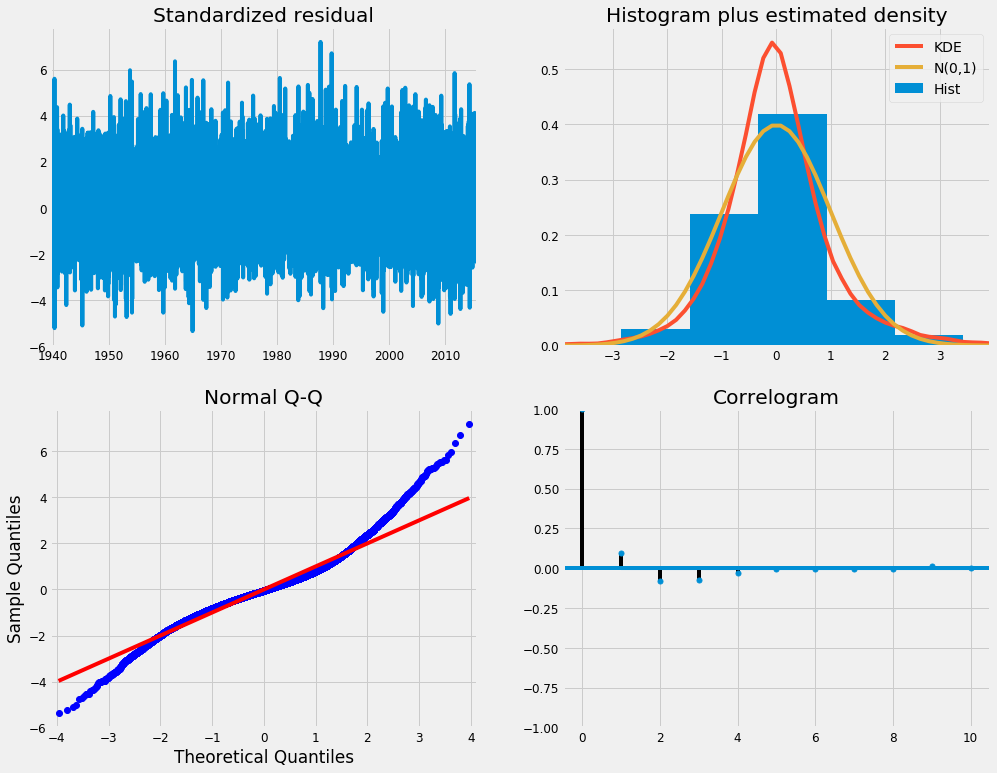

In [321]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Points to be considered from the above chart:

Top Right Plot:
1. From the given station data the residuals of our model should be uncorrelated and normally distributed with zero-mean and and standard deviation of 1. This is a good indication that the residuals are normally distributed.

Bottom Left Plot:
2. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1).

Top Left Plot:
3. The residuals over time (top left plot) display any obvious seasonality and appear to be white noise. 

Bottom Right Plot:
4. The residuals can be confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

In [328]:
pred = results.get_prediction(start=pd.to_datetime('1960-01-01'), dynamic=False)
pred_ci = pred.conf_int()

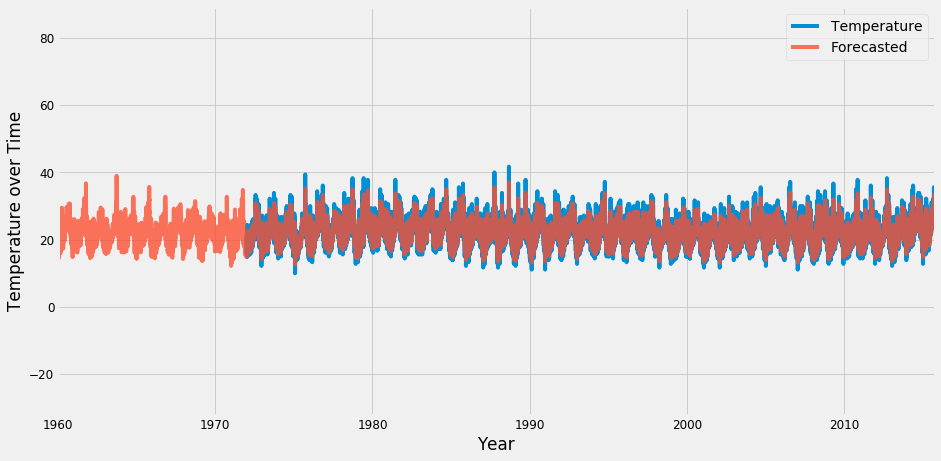

In [344]:
ax=data['1972':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecasted',
                        alpha=.79, figsize=(14,7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='m', alpha=.2)

ax.set_xlabel('Year')
ax.set_ylabel('Temperature over Time')
plt.legend()

plt.show()

MSE of 0 would that the estimator is predicting observations of the parameter with perfect accuracy.

In [330]:
#y_forecasted = pred.predicted_mean
#y_truth = data['2007-01-01':]


#mse = ((y_forecasted - y_truth) ** 2).mean()
#print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [345]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1960-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

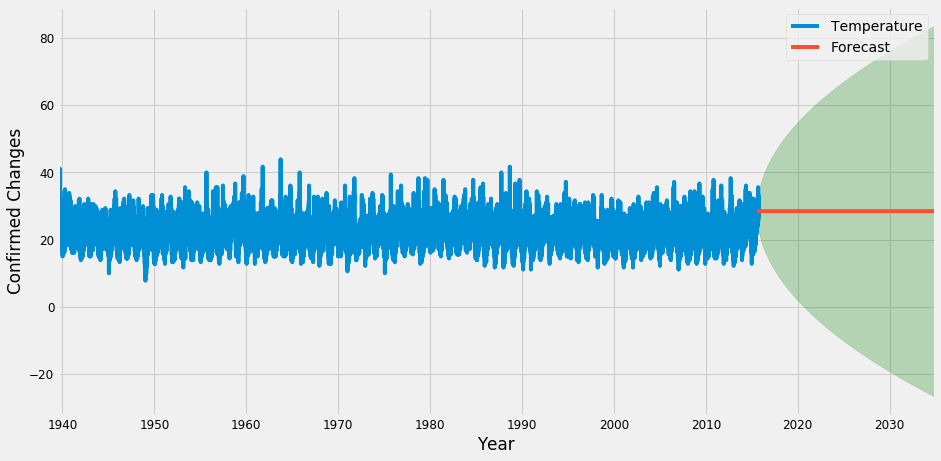

In [346]:
pred_uc = results.get_forecast(steps=7000)
pred_ci = pred_uc.conf_int()

ax = data.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='g', alpha=.25)

ax.set_xlabel('Year')
ax.set_ylabel('Confirmed Changes')

plt.legend()
plt.show()